In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Exam_Score_Prediction.csv")

In [3]:
df.sample(7)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
9169,9170,22,other,ba,2.94,57.7,yes,4.6,good,online videos,low,moderate,52.0
17600,17601,18,male,b.tech,4.52,58.9,yes,5.9,average,mixed,high,moderate,57.0
16972,16973,21,male,b.sc,1.76,48.9,yes,6.8,poor,mixed,medium,easy,29.6
19867,19868,18,male,bca,7.91,84.1,yes,8.1,average,mixed,medium,easy,100.0
6283,6284,18,male,bba,0.41,53.4,yes,4.4,average,mixed,medium,hard,22.6
8349,8350,23,male,b.sc,6.45,48.9,yes,9.4,good,mixed,low,moderate,79.0
15550,15551,24,male,bca,5.78,59.6,yes,9.0,average,group study,high,easy,100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [5]:
print(f"Missing Values  : {df.isnull().sum().sum()}")
print(f"Duplicate Rows  : {df.duplicated().sum()}")
print(f"Data Shape      : {df.shape}")
print(f"Column Names    : {list(df.columns)}")

Missing Values  : 0
Duplicate Rows  : 0
Data Shape      : (20000, 13)
Column Names    : ['student_id', 'age', 'gender', 'course', 'study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'exam_score']


In [6]:
df = df.drop("student_id", axis=1)

In [7]:
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [8]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(df[col].value_counts())
        print("-" * 30)

gender
other     6726
male      6695
female    6579
Name: count, dtype: int64
------------------------------
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64
------------------------------
internet_access
yes    16988
no      3012
Name: count, dtype: int64
------------------------------
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64
------------------------------
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64
------------------------------
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64
------------------------------
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64
------------------------------


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [10]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'O']
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']

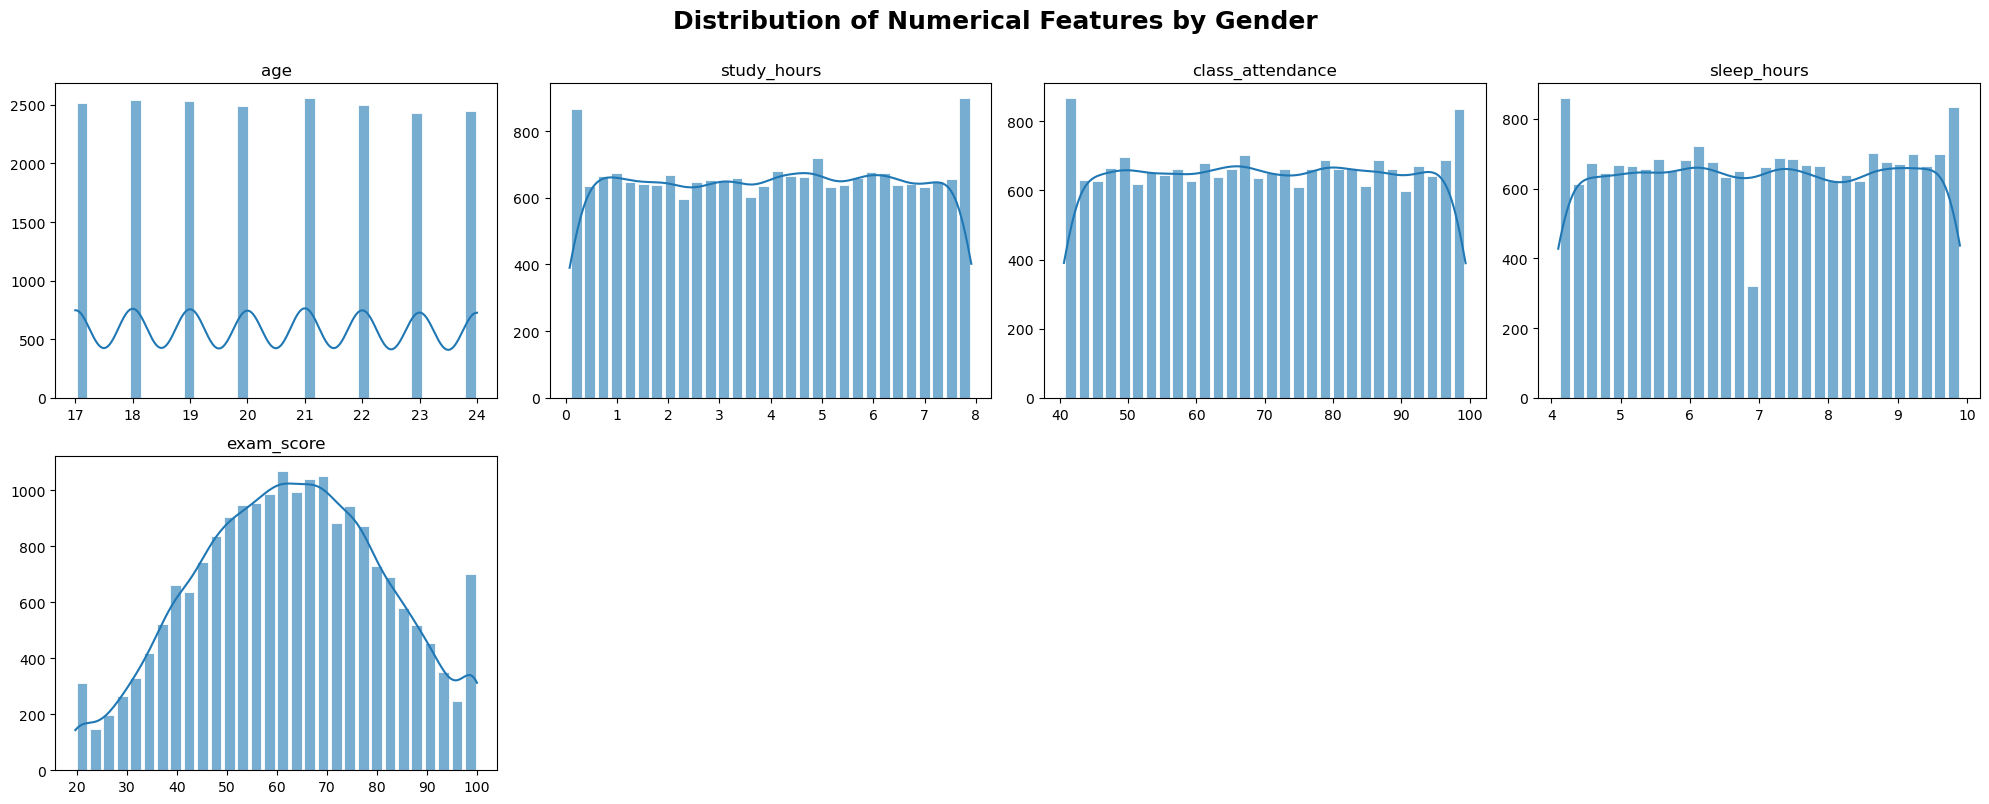

In [11]:
def plot_all_histograms(df):
    num_cols = num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    n_cols = 4
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data=df, x=col, kde=True, bins=30, color="#1f77b4", edgecolor="White", alpha=0.6, multiple="dodge", shrink=0.8)
        plt.title(col)
        plt.xlabel("")
        plt.ylabel("")
        
    plt.suptitle("Distribution of Numerical Features by Gender", fontsize=18, fontweight="bold", color="black" ,y=1.0)
    plt.tight_layout()
    plt.show()
plot_all_histograms(df)

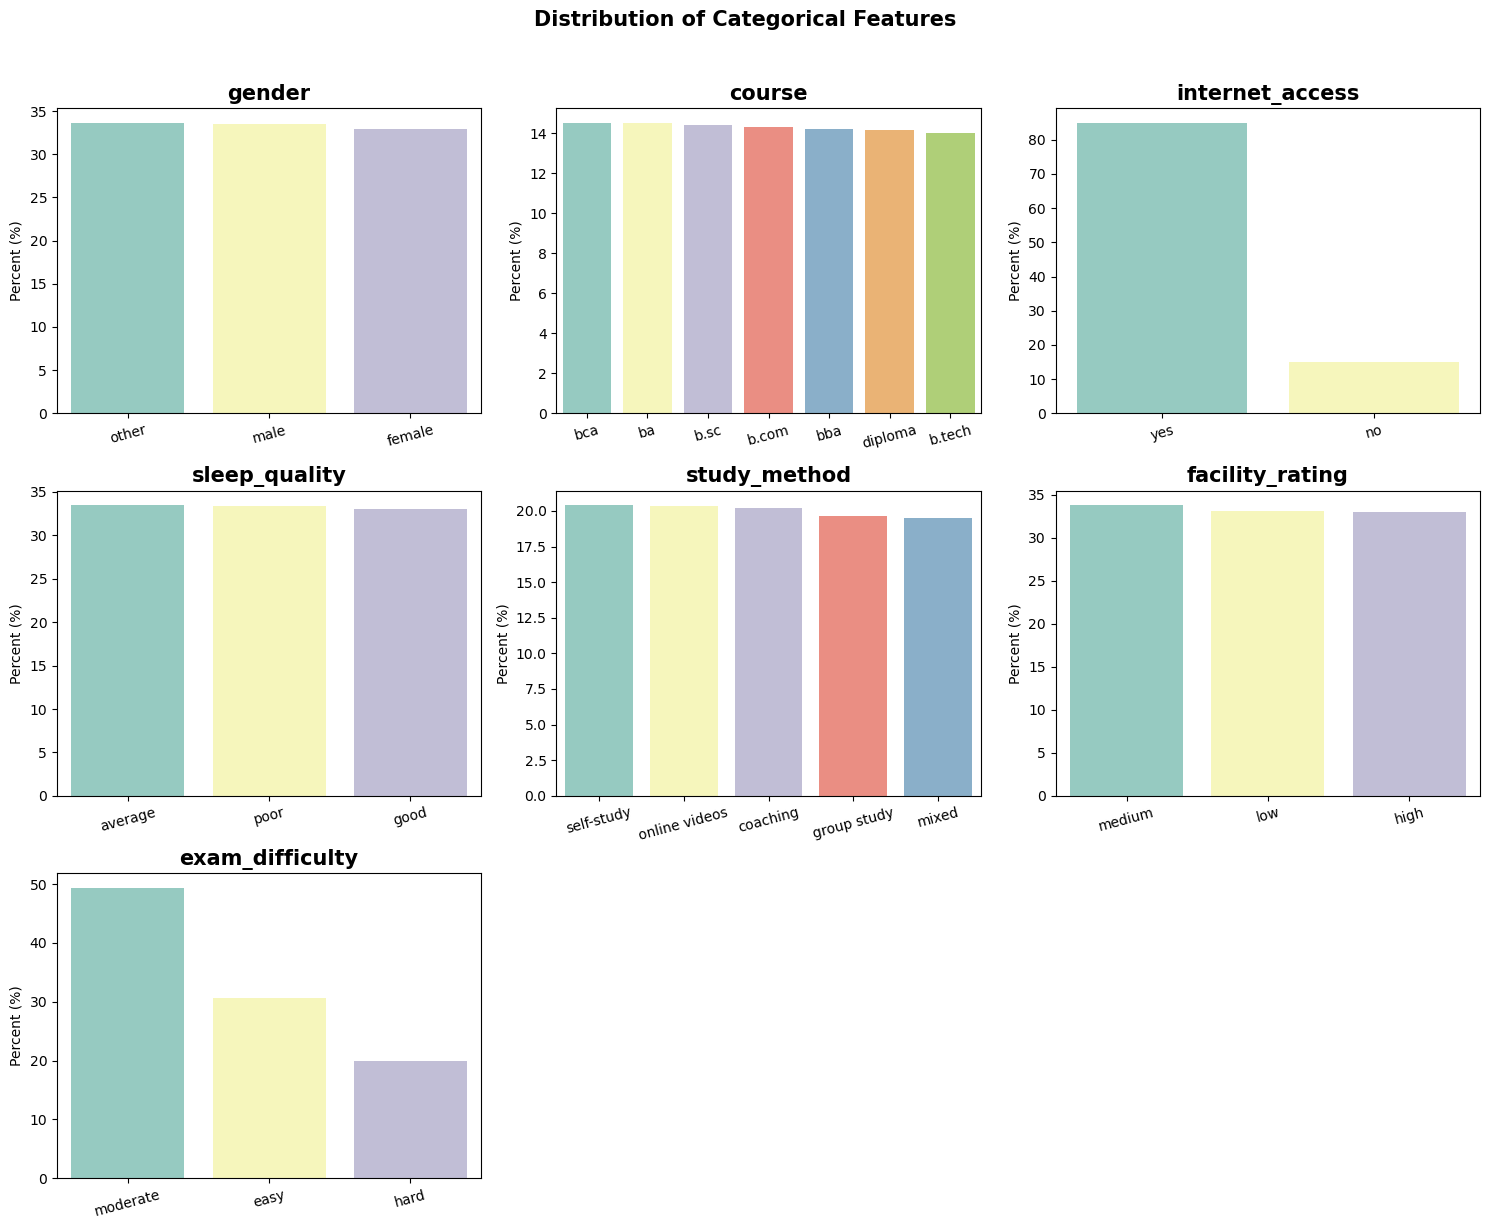

In [12]:
def plot_all_categorical_counts(df, categorical_columns):
    n_cols = 3
    n_rows = math.ceil(len(categorical_columns) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    palette = sns.color_palette("Set3")

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(data=df, x=col, palette=palette, order=df[col].value_counts().index, stat="percent")
        plt.title(col, fontweight="bold", fontsize=15)
        plt.xlabel("")
        plt.ylabel("Percent (%)")
        plt.xticks(rotation=15)
        
        plt.suptitle("Distribution of Categorical Features", fontsize=15, fontweight="bold", color="black", y=1.02)

    plt.tight_layout()
    plt.show()



plot_all_categorical_counts(df, categorical_columns)

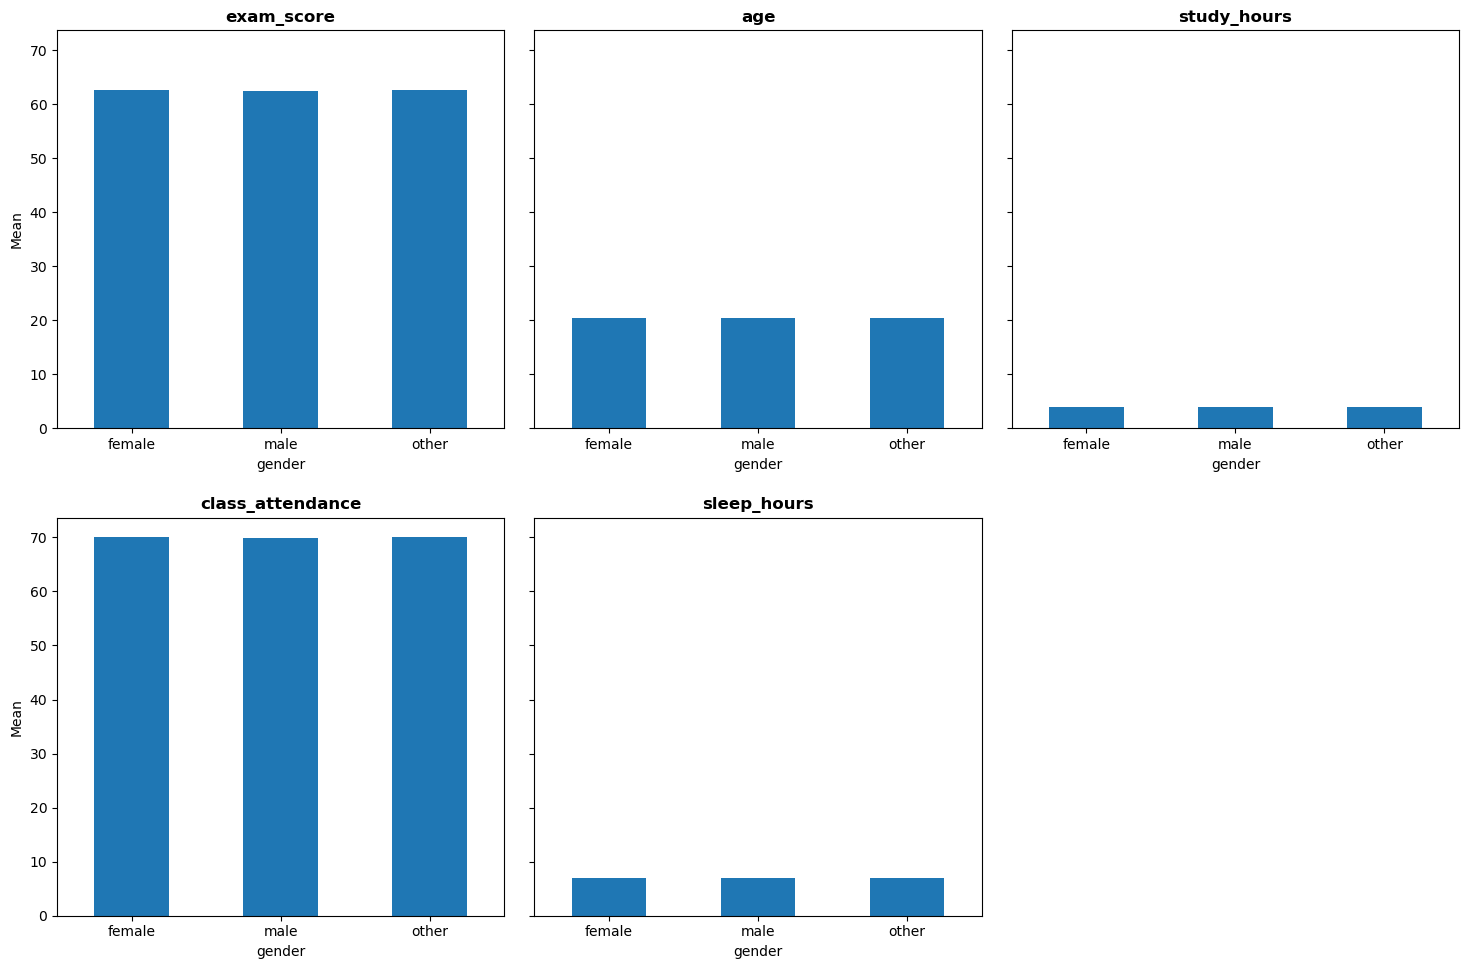

,exam_score,age,study_hours,class_attendance,sleep_hours
gender,,,,,
female,62.582145,20.480164,3.995861,70.147500,7.033121
male,62.397480,20.466169,4.022018,69.851262,6.982479
other,62.561023,20.473684,4.004741,70.055412,7.010497


In [13]:
a =df.groupby("gender")[["exam_score","age", "study_hours", "class_attendance", "sleep_hours"]].mean()

fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey=True)
axes = axes.flatten()


for i, col in enumerate(a.columns):
    a[col].plot(kind="bar", ax=axes[i])
    axes[i].set_title(col, fontweight="bold")
    axes[i].set_ylabel("Mean")
    axes[i].set_xticklabels(a.index, rotation=0)



for j in range(len(a.columns), len(axes)):
    fig.delaxes(axes[j])
plt.rcParams.update({'font.size': 17})
plt.tight_layout()
plt.show()

display(a)

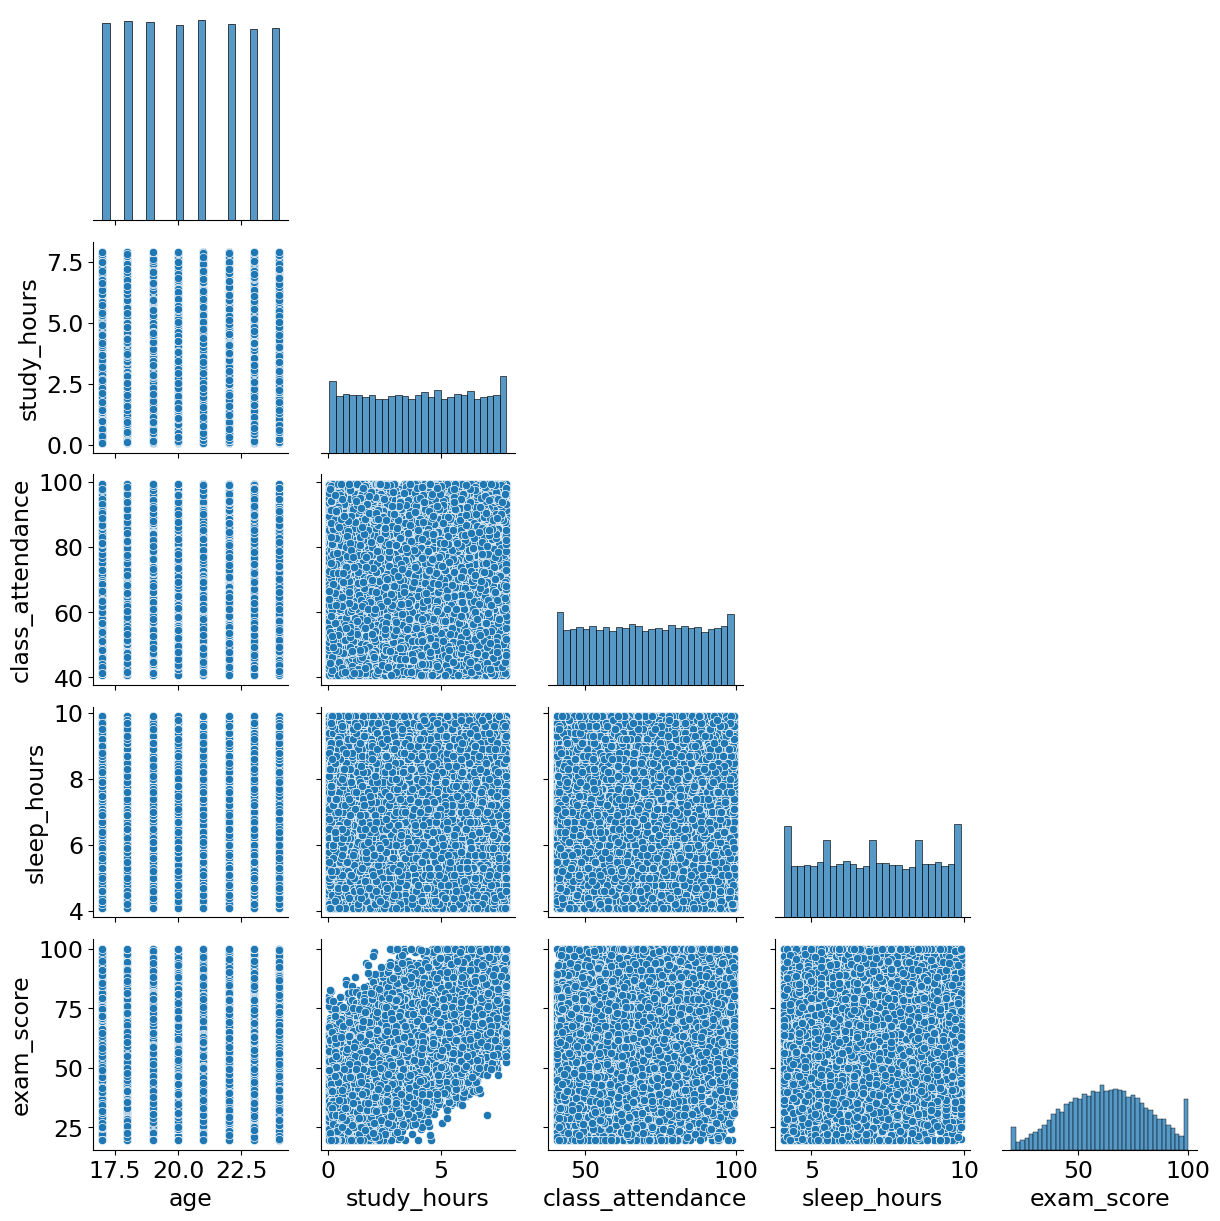

In [14]:
sns.pairplot(df, corner=True)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


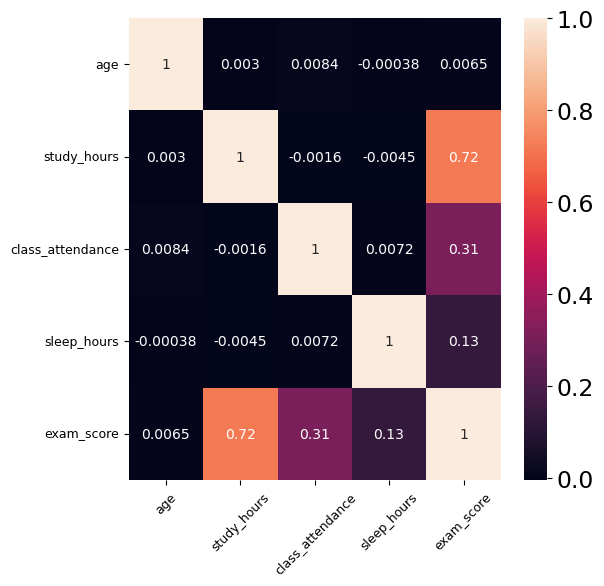

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={"size": 10})
plt.xticks(fontsize=9, rotation=45) 
plt.yticks(fontsize=9, rotation=0)
plt.show()

In [17]:
def find_outlier_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count": outliers.shape[0],
            "outliers_percentage": 100 * outliers.shape[0] / df.shape[0],
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }

    return pd.DataFrame(outlier_summary)

find_outlier_iqr(df[numerical_columns], threshold = 1.5)

,age,study_hours,class_attendance,sleep_hours,exam_score
outlier_count,0.0,0.0,0.00,0.0,0.00
outliers_percentage,0.0,0.0,0.00,0.0,0.00
lower_bound,12.0,-4.0,10.25,1.0,7.55
upper_bound,28.0,12.0,129.85,13.0,117.55


# Preprocessing Notes

- **course, study_method** → One-hot encoding  
- **internet_access** → Binary encoding (`yes = 1`, `no = 0`)  
- **sleep_quality, facility_rating, exam_difficulty** → Ordinal encoding  

- **Gender** has 3 categories: `male`, `female`, `other`.  
  - The `other` category represents roughly **one‑third of the dataset**.  
  - Because removing it would cause significant information loss, we will design **two scenarios**:  
    1. **Drop scenario:** Remove all rows with `other` values and train the model only with `male` and `female`.  
    2. **Unknown scenario:** Replace `other` values with `NaN` and treat them as an “unknown” category, allowing the model to learn it as a separate class.  
  - After training both versions, we will compare performance and decide which approach is more effective.

In [18]:
df["internet_access"] = df["internet_access"].map({"yes": 1, "no": 2})
print(df["internet_access"].value_counts(dropna=False))

internet_access
1    16988
2     3012
Name: count, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  int64  
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


In [20]:
df1 = df[df["gender"].isin(["male", "female"])]   # 1.scenario

df2 = df.copy()
df2.loc[df2["gender"] == "other", "gender"] = np.nan   # 2.scenario

In [21]:
df1.shape, df2.shape

((13274, 12), (20000, 12))

In [22]:
print(df1["gender"].value_counts(dropna=False))
print(df2["gender"].value_counts(dropna=False))

gender
male      6695
female    6579
Name: count, dtype: int64
gender
NaN       6726
male      6695
female    6579
Name: count, dtype: int64


# Independent & Dependent Features

In [23]:
# df1

In [24]:
df1["gender"] = df1["gender"].map({"male": 0, "female": 1})

In [25]:
X_df1 = df1.drop("exam_score",axis=1)
y_df1 = df1["exam_score"]

In [26]:
from sklearn.model_selection import train_test_split

X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.2, random_state=25)

X_train_df1.shape, X_test_df1.shape, y_train_df1.shape, y_test_df1.shape

((10619, 11), (2655, 11), (10619,), (2655,))

# Encoding and scaling

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [28]:
ordinal_encoder = OrdinalEncoder(categories = [
    ["poor", "average", "good"],  # sleep_quality
    ["low", "medium", "high"],  # facility_rating
    ["easy", "moderate", "hard"],  # exam_difficulty
])

numerical_columns = [col for col in X_train_df1 if df[col].dtype != 'O']



preprocessor = ColumnTransformer(transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), ["course", "study_method"]),
        ("ord", ordinal_encoder, ["sleep_quality", "facility_rating", "exam_difficulty"]),
        ("num", StandardScaler(), numerical_columns)],
        remainder="passthrough"
                                )

X_train_df1_transformed = preprocessor.fit_transform(X_train_df1)
X_test_df1_transformed = preprocessor.transform(X_test_df1)

In [29]:
X_train_df1_transformed_df = pd.DataFrame(X_train_df1_transformed, 
                                          columns=preprocessor.get_feature_names_out(), 
                                          index=X_train_df1.index)

X_test_df1_transformed_df = pd.DataFrame(X_test_df1_transformed, 
                                         columns=preprocessor.get_feature_names_out(), 
                                         index=X_test_df1.index)

In [30]:
X_train_df1_transformed_df

,cat__course_b.sc,cat__course_b.tech,cat__course_ba,cat__course_bba,cat__course_bca,cat__course_diploma,cat__study_method_group study,cat__study_method_mixed,cat__study_method_online videos,cat__study_method_self-study,ord__sleep_quality,ord__facility_rating,ord__exam_difficulty,num__age,num__study_hours,num__class_attendance,num__internet_access,num__sleep_hours,remainder__gender
13017,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.232212,1.225681,1.615560,-0.420728,-0.289100,1.0
6685,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.079183,1.542858,-1.339835,2.376835,-0.231162,0.0
10420,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.543607,-0.729520,-0.264095,-0.420728,1.333159,1.0
7654,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,-1.079183,-1.637601,0.215940,-0.420728,0.232340,1.0
5508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.232212,1.382097,-1.345619,2.376835,-1.563732,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12767,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.106475,1.638445,1.684962,-0.420728,0.695843,0.0
4453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.669344,-0.881591,-0.397116,2.376835,0.348216,0.0
15665,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,-1.516314,1.156162,1.615560,-0.420728,-0.462913,1.0
9987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,-0.642051,-1.042352,0.823213,-0.420728,-0.926416,1.0


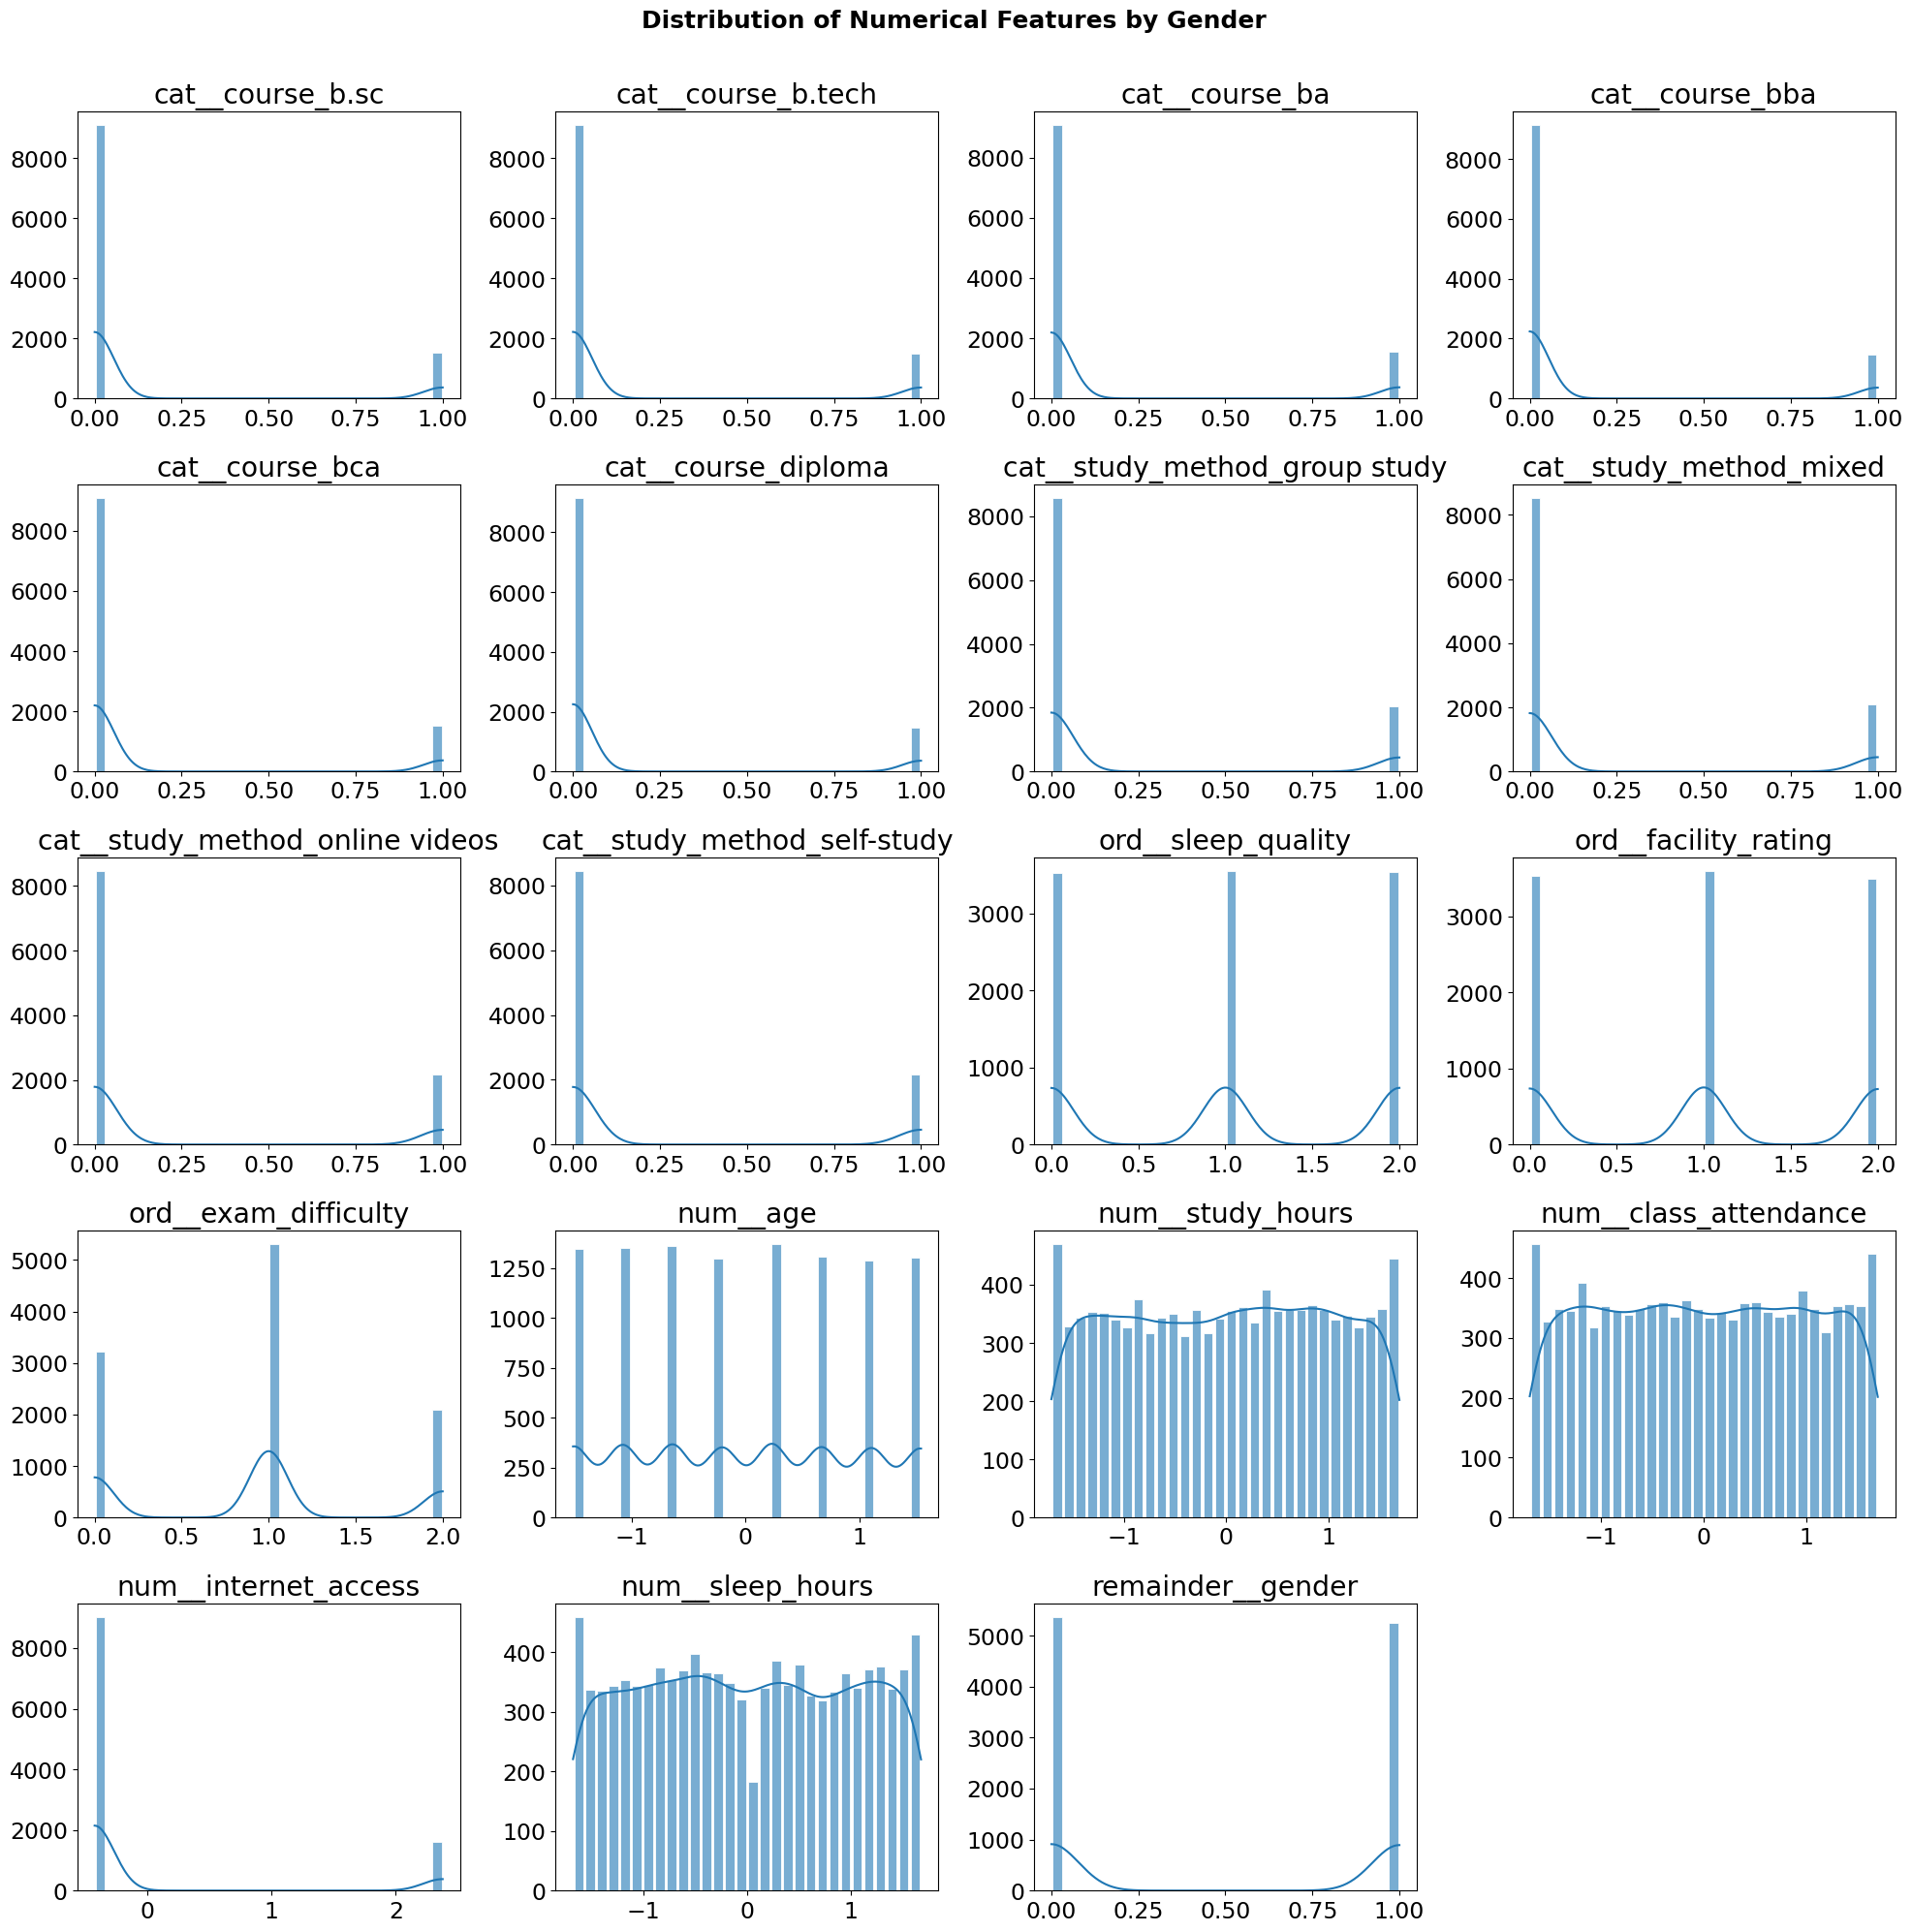

In [31]:
plot_all_histograms(X_train_df1_transformed_df)

In [32]:
X_test_df1_transformed_df.describe()

,cat__course_b.sc,cat__course_b.tech,cat__course_ba,cat__course_bba,cat__course_bca,cat__course_diploma,cat__study_method_group study,cat__study_method_mixed,cat__study_method_online videos,cat__study_method_self-study,ord__sleep_quality,ord__facility_rating,ord__exam_difficulty,num__age,num__study_hours,num__class_attendance,num__internet_access,num__sleep_hours,remainder__gender
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000
mean,0.149529,0.137853,0.149529,0.142750,0.138230,0.141620,0.192090,0.193974,0.207533,0.211676,1.000753,1.015819,0.857250,0.009448,0.000054,0.009190,-0.020323,0.024899,0.498305
std,0.356677,0.344811,0.356677,0.349883,0.345206,0.348725,0.394018,0.395483,0.405617,0.408573,0.820333,0.811869,0.709208,0.997561,1.003403,1.014028,0.979895,1.006547,0.500091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.516314,-1.707120,-1.698415,-0.420728,-1.679607,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.079183,-0.868556,-0.865584,-0.420728,-0.868478,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.232212,0.004767,0.001949,-0.420728,0.058527,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.106475,0.878090,0.889724,-0.420728,0.927594,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.543607,1.694929,1.702313,2.376835,1.680786,1.000000


# Regression Models

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [35]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "SVR": SVR(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor(verbosity=-1)
}

In [36]:
def evaluate_models(models, X_train, y_train, X_test, y_test, evaluate_fn):
    """
    Trains the given models, makes predictions, and returns evaluation metrics.

    Parameters:
    - models: dict, model name → model instance
    - X_train, y_train: training data
    - X_test, y_test: test data
    - evaluate_fn: callable, (y_true, y_pred) → (mae, rmse, r2)

    Returns:
    - pd.DataFrame: table containing evaluation metrics for each model
    """
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        mae_train, rmse_train, r2_train = evaluate_fn(y_train, y_train_pred)
        mae_test, rmse_test, r2_test = evaluate_fn(y_test, y_test_pred)

        results.append({
            "Model": name,
            "Train MAE": mae_train,
            "Train RMSE": rmse_train,
            "Train R2": r2_train,
            "Test MAE": mae_test,
            "Test RMSE": rmse_test,
            "Test R2": r2_test
        })

    return pd.DataFrame(results)

evaluate_df1 = evaluate_models(models, X_train_df1_transformed, y_train_df1, X_test_df1_transformed, y_test_df1, evaluate_model)
evaluate_df1

,Model,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
0,Linear Regression,7.863273,9.768751,0.731293,7.852564,9.853721,0.729916
1,Lasso,8.649046,10.694360,0.677959,8.561248,10.666221,0.683539
2,LassoCV,7.867891,9.771431,0.731145,7.853188,9.852710,0.729971
3,Ridge,7.863319,9.768754,0.731292,7.852376,9.853528,0.729926
4,RidgeCV,7.863319,9.768754,0.731292,7.852376,9.853528,0.729926
5,ElasticNet,9.796194,12.043296,0.591594,9.733102,12.049204,0.596154
6,ElasticNetCV,7.910579,9.814838,0.728751,7.882475,9.875562,0.728717
7,SVR,7.888648,9.889147,0.724628,8.132069,10.163163,0.712686
8,K Neighbors Regressor,7.705968,9.613503,0.739765,9.424561,11.753393,0.615740
9,Decision Tree Regressor,0.000000,0.000000,1.000000,11.848718,14.918479,0.380918


# Hyperparameter Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
params = {
    'Ridge': {"alpha": [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0]},
    'SVR':   {'C' : [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.001],
              'kernel' : ["rbf", "linear"]},
    
    'K Neighbors Regressor': {'n_neighbors': [3, 5, 7, 9],
                            'weights': ['uniform', 'distance']},
    
    'Decision Tree Regressor': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                              'splitter': ['best', 'random'],
                              'max_depth': [None, 5, 10, 20],
                              
                              'max_features': ['sqrt', 'log2', None]},
    'Adaboost Regressor' : {"n_estimators": [50, 80, 100, 120],
                            "learning_rate": [0.001, 0.01, 0.1, 1.0, 2.0],
                            "loss": ["linear", "square", "exponential"]},
    
    'Gradient Boost Regressor': {"n_estimators" : [100, 150, 200],
                                "max_depth" : [3,4,5],
                                "loss" : ["squared_error", "absolute_error", "huber", "quantile"],
                                "learning_rate" : [0.01, 0.1, 0.5]},
    
    'XGBoost Regressor': {"learning_rate": [0.1, 0.01],
                        "max_depth": [5,8,12,20,30],
                        "n_estimators": [100,200,300,500],
                        "colsample_bytree": [0.3, 0.4, 0.5, 0.7, 1]},
    
    'LightGBM Regressor': {"num_leaves": [31,50,70],
                            "max_depth": [-1, 5, 10],
                            "learning_rate": [0.01, 0.05, 0.1],
                            "n_estimators": [100, 300, 1000],
                            "min_child_samples": [10,20,30],
                            "subsample": [0.6, 0.8, 1.0],
                            "colsample_bytree": [0.6, 0.8, 1.0],
                            "reg_alpha": [0, 0.5, 1.0],
                            "reg_lambda": [0, 0.5, 1.0]}
}

In [39]:
optimized_models = {}

for name, model in models.items():
    if name not in params:
        print(f"No parameter definition for {name}, skipping.")
        continue

    print(f"Starting RandomizedSearchCV for {name}...")

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params[name],
        n_iter=20,  
        scoring='r2',
        cv=5,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train_df1_transformed, y_train_df1)
    optimized_models[name] = search.best_estimator_

# Evaluate optimized models
evaluate_optimized_df1 = evaluate_models(optimized_models, X_train_df1_transformed, y_train_df1, X_test_df1_transformed, y_test_df1, evaluate_model)

No parameter definition for Linear Regression, skipping.
Starting RandomizedSearchCV for Lasso...
No parameter definition for LassoCV, skipping.
Starting RandomizedSearchCV for Ridge...
No parameter definition for RidgeCV, skipping.
No parameter definition for ElasticNet, skipping.
No parameter definition for ElasticNetCV, skipping.
Starting RandomizedSearchCV for SVR...
Starting RandomizedSearchCV for K Neighbors Regressor...
Starting RandomizedSearchCV for Decision Tree Regressor...
No parameter definition for Random Forest Regressor, skipping.
Starting RandomizedSearchCV for Adaboost Regressor...
Starting RandomizedSearchCV for Gradient Boost Regressor...
Starting RandomizedSearchCV for XGBoost Regressor...
Starting RandomizedSearchCV for LightGBM Regressor...


In [40]:
evaluate_optimized_df1

,Model,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
0,Lasso,7.865014e+00,9.769487,0.731252,7.852162,9.852907,0.729960
1,Ridge,7.863319e+00,9.768754,0.731292,7.852376,9.853528,0.729926
2,SVR,7.858044e+00,9.776622,0.730859,7.852040,9.858802,0.729637
3,K Neighbors Regressor,8.273975e-07,0.000002,1.000000,9.074696,11.291829,0.645328
4,Decision Tree Regressor,9.344665e+00,11.562320,0.623564,9.540405,11.958571,0.602207
5,Adaboost Regressor,8.627656e+00,10.560474,0.685972,8.659531,10.776062,0.676988
6,Gradient Boost Regressor,7.510426e+00,9.364946,0.753048,8.020304,10.052105,0.718931
7,XGBoost Regressor,6.462436e+00,8.086727,0.815860,8.186198,10.197383,0.710748
8,LightGBM Regressor,7.303188e+00,9.062370,0.768748,8.041761,10.062695,0.718339


# df2

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            13274 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  int64  
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


In [42]:
X_df2 = df2.drop("exam_score",axis=1)
y_df2 = df2["exam_score"]

In [43]:
from sklearn.model_selection import train_test_split

X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=25)

X_train_df2.shape, X_test_df2.shape, y_train_df2.shape, y_test_df2.shape

((16000, 11), (4000, 11), (16000,), (4000,))

In [44]:
ordinal_encoder = OrdinalEncoder(categories = [
    ["poor", "average", "good"],  # sleep_quality
    ["low", "medium", "high"],  # facility_rating
    ["easy", "moderate", "hard"],  # exam_difficulty
])

numerical_columns = [col for col in X_train_df1 if df[col].dtype != 'O']



preprocessor = ColumnTransformer(transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), ["course", "study_method", "gender"]),
        ("ord", ordinal_encoder, ["sleep_quality", "facility_rating", "exam_difficulty"]),
        ("num", StandardScaler(), numerical_columns)],
        remainder="passthrough"
                                )

X_train_df2_transformed = preprocessor.fit_transform(X_train_df2)
X_test_df2_transformed = preprocessor.transform(X_test_df2)

In [45]:
X_train_df2_transformed_df = pd.DataFrame(X_train_df2_transformed, 
                                          columns=preprocessor.get_feature_names_out(), 
                                          index=X_train_df2.index)

X_test_df2_transformed_df = pd.DataFrame(X_test_df2_transformed, 
                                         columns=preprocessor.get_feature_names_out(), 
                                         index=X_test_df2.index)

In [46]:
X_train_df2_transformed_df

,cat__course_b.sc,cat__course_b.tech,cat__course_ba,cat__course_bba,cat__course_bca,cat__course_diploma,cat__study_method_group study,cat__study_method_mixed,cat__study_method_online videos,cat__study_method_self-study,cat__gender_male,cat__gender_nan,ord__sleep_quality,ord__facility_rating,ord__exam_difficulty,num__age,num__study_hours,num__class_attendance,num__internet_access,num__sleep_hours
16784,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,-0.640339,-0.361541,0.705928,-0.423168,-1.329760
2957,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.202800,-0.717367,1.385937,-0.423168,0.283485
18829,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.109819,1.500040,0.469653,2.363126,1.666266
12230,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.515419,-1.112248,0.060496,-0.423168,-0.811217
7278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.234740,0.814423,-0.348662,2.363126,-0.004595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7324,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,-0.202800,1.222321,0.285244,-0.423168,-1.502608
1160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.234740,-0.005714,1.374411,-0.423168,1.320571
1175,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,-0.640339,-0.400595,-1.236131,-0.423168,-0.177443
2934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.109819,0.857816,-0.198830,-0.423168,1.378187


In [47]:
evaluate_df2 = evaluate_models(models, X_train_df2_transformed, y_train_df2, X_test_df2_transformed, y_test_df2, evaluate_model)
evaluate_df2

,Model,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
0,Linear Regression,7.857456,9.802188,0.730062,7.831439,9.719181,0.740287
1,Lasso,8.619909,10.687750,0.679085,8.538613,10.604549,0.690815
2,LassoCV,7.860131,9.803592,0.729985,7.831108,9.718145,0.740342
3,Ridge,7.857508,9.802190,0.730062,7.831496,9.719227,0.740284
4,RidgeCV,7.857508,9.802190,0.730062,7.831496,9.719227,0.740284
5,ElasticNet,9.778247,12.043598,0.592498,9.754824,12.051289,0.600698
6,ElasticNetCV,7.903196,9.845032,0.727697,7.872027,9.767783,0.737683
7,SVR,7.853117,9.879133,0.725808,8.042818,9.969867,0.726717
8,K Neighbors Regressor,7.720327,9.625772,0.739691,9.565740,11.796264,0.617419
9,Decision Tree Regressor,0.000000,0.000000,1.000000,12.076568,15.216869,0.363373


In [48]:
evaluate_optimized_df2 = evaluate_models(optimized_models, X_train_df2_transformed, y_train_df2, X_test_df2_transformed, y_test_df2, evaluate_model)

In [49]:
evaluate_optimized_df2

,Model,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
0,Lasso,7.859340e+00,9.803046e+00,0.730015,7.830766,9.718021,0.740349
1,Ridge,7.857508e+00,9.802190e+00,0.730062,7.831496,9.719227,0.740284
2,SVR,7.852322e+00,9.808455e+00,0.729717,7.845357,9.735509,0.739414
3,K Neighbors Regressor,2.231748e-07,9.458829e-07,1.000000,9.098092,11.254344,0.651763
4,Decision Tree Regressor,9.388703e+00,1.166227e+01,0.617894,9.501229,11.832788,0.615046
5,Adaboost Regressor,8.536013e+00,1.053188e+01,0.688377,8.526059,10.517075,0.695894
6,Gradient Boost Regressor,7.599025e+00,9.515506e+00,0.745621,7.905706,9.811605,0.735324
7,XGBoost Regressor,6.831582e+00,8.557154e+00,0.794280,7.962212,9.924481,0.729199
8,LightGBM Regressor,7.468636e+00,9.312107e+00,0.756380,7.938425,9.837230,0.733940


In [50]:
# df1 default ve optimized
df1_default = evaluate_df1[["Model", "Train R2", "Test R2"]].rename(
    columns={"Train R2": "df1 Train R2", "Test R2": "df1 Test R2"})

df1_opt = evaluate_optimized_df1[["Model", "Train R2", "Test R2"]].rename(
    columns={"Train R2": "df1 Opt Train R2", "Test R2": "df1 Opt Test R2"})

# df2 default ve optimized
df2_default = evaluate_df2[["Model", "Train R2", "Test R2"]].rename(
    columns={"Train R2": "df2 Train R2", "Test R2": "df2 Test R2"})

df2_opt = evaluate_optimized_df2[["Model", "Train R2", "Test R2"]].rename(
    columns={"Train R2": "df2 Opt Train R2", "Test R2": "df2 Opt Test R2"})


comparison = (
    df1_default
    .merge(df1_opt, on="Model", how="outer")
    .merge(df2_default, on="Model", how="outer")
    .merge(df2_opt, on="Model", how="outer"))


display(comparison)   

,Model,df1 Train R2,df1 Test R2,df1 Opt Train R2,df1 Opt Test R2,df2 Train R2,df2 Test R2,df2 Opt Train R2,df2 Opt Test R2
0,Adaboost Regressor,0.667024,0.665919,0.685972,0.676988,0.657883,0.666617,0.688377,0.695894
1,Decision Tree Regressor,1.000000,0.380918,0.623564,0.602207,1.000000,0.363373,0.617894,0.615046
2,ElasticNet,0.591594,0.596154,NaN,NaN,0.592498,0.600698,NaN,NaN
3,ElasticNetCV,0.728751,0.728717,NaN,NaN,0.727697,0.737683,NaN,NaN
4,Gradient Boost Regressor,0.742662,0.720328,0.753048,0.718931,0.737474,0.733437,0.745621,0.735324
5,K Neighbors Regressor,0.739765,0.615740,1.000000,0.645328,0.739691,0.617419,1.000000,0.651763
6,Lasso,0.677959,0.683539,0.731252,0.729960,0.679085,0.690815,0.730015,0.740349
7,LassoCV,0.731145,0.729971,NaN,NaN,0.729985,0.740342,NaN,NaN
8,LightGBM Regressor,0.785103,0.715772,0.768748,0.718339,0.769275,0.732096,0.756380,0.733940
9,Linear Regression,0.731293,0.729916,NaN,NaN,0.730062,0.740287,NaN,NaN


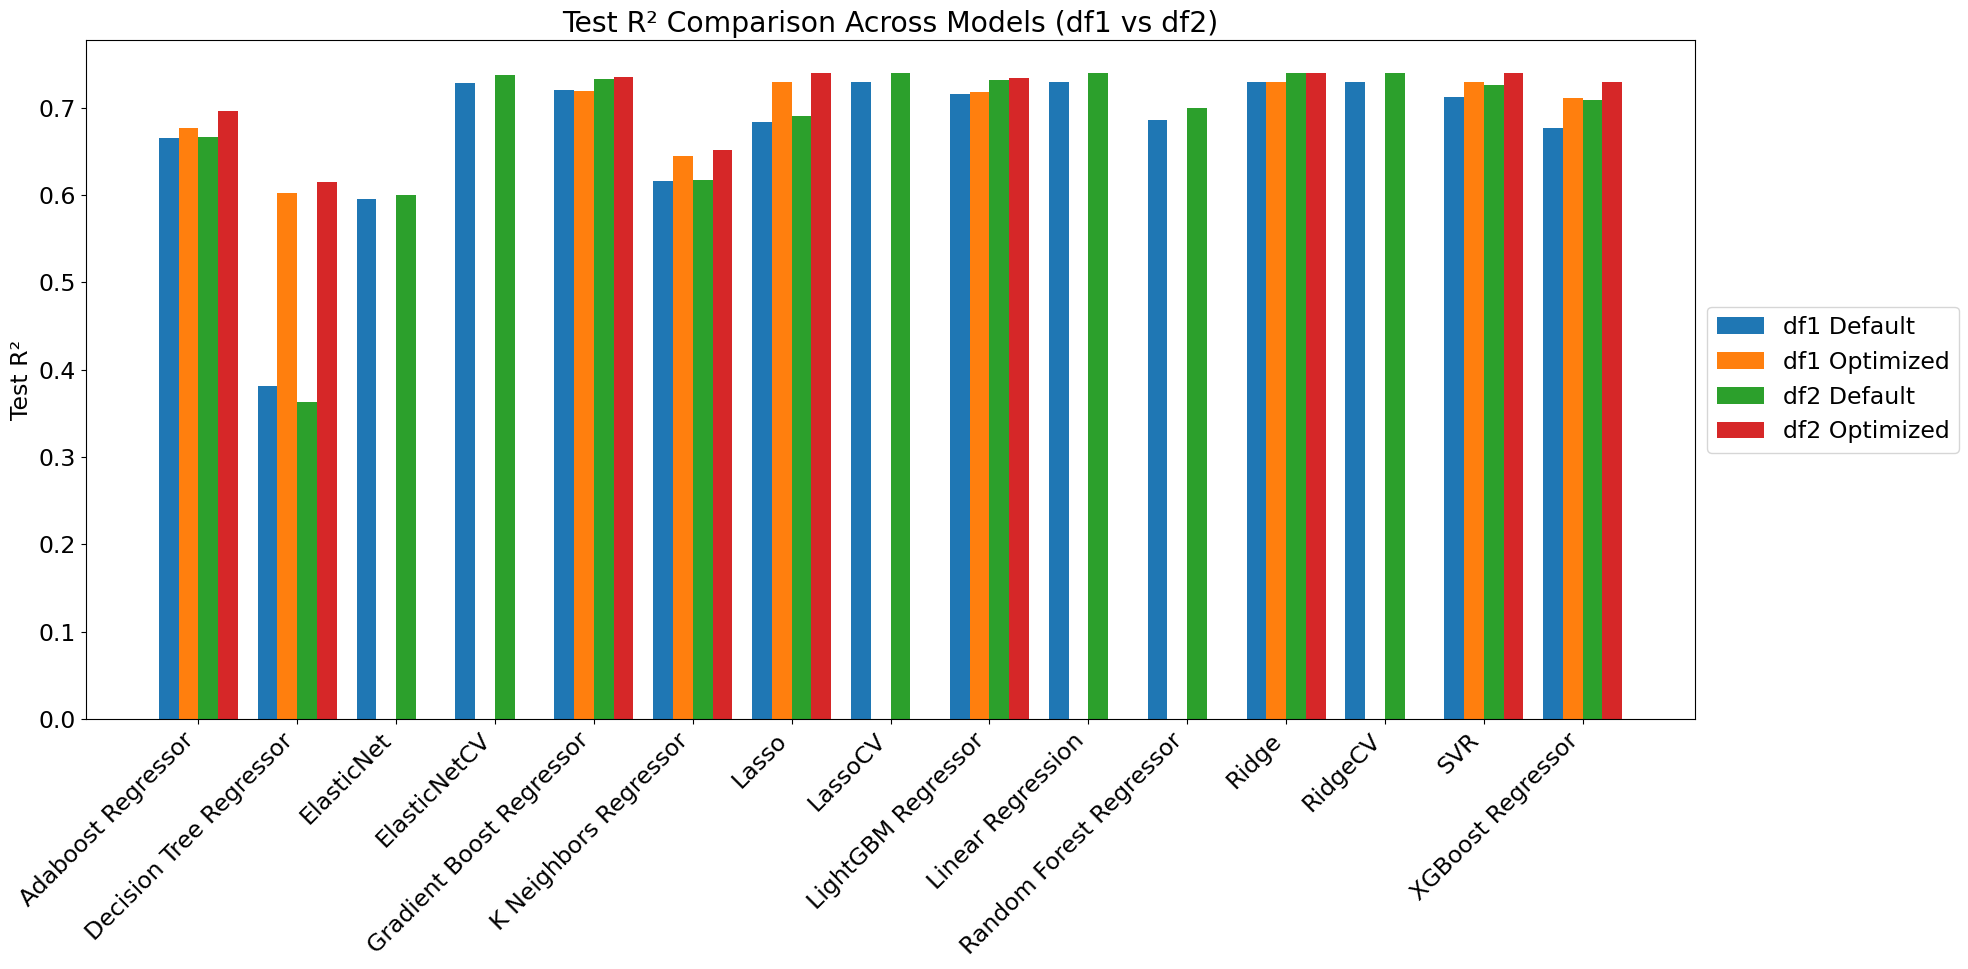

In [54]:
test_r2 = comparison[[
    "Model", "df1 Test R2", "df1 Opt Test R2", "df2 Test R2", "df2 Opt Test R2"
]]

# Plot
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.2
index = range(len(test_r2))

ax.bar([i - 1.5*bar_width for i in index], test_r2["df1 Test R2"], bar_width, label="df1 Default")
ax.bar([i - 0.5*bar_width for i in index], test_r2["df1 Opt Test R2"], bar_width, label="df1 Optimized")
ax.bar([i + 0.5*bar_width for i in index], test_r2["df2 Test R2"], bar_width, label="df2 Default")
ax.bar([i + 1.5*bar_width for i in index], test_r2["df2 Opt Test R2"], bar_width, label="df2 Optimized")

ax.set_xticks(index)
ax.set_xticklabels(test_r2["Model"], rotation=45, ha="right")
ax.set_ylabel("Test R²")
ax.set_title("Test R² Comparison Across Models (df1 vs df2)")

# Legend'i dışarı al
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## 📌 Conclusion

- We evaluated various regression models with both default and optimized parameters.  
- Hyperparameter tuning provided significant performance improvements, especially for boosting-based models (Gradient Boost, XGBoost, LightGBM).  
- Linear models (Ridge, Lasso) performed stronger than expected, reaching competitive levels with tree-based models. This indicates that linear relationships are dominant in the dataset.  
- Decision Tree and KNN models showed a tendency toward overfitting, with very high training scores but relatively low test scores.  
- Between df1 and df2 encoding strategies, no significant performance difference was observed. Both approaches produced similar results.  